# Holt-Winters exponential smoothing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

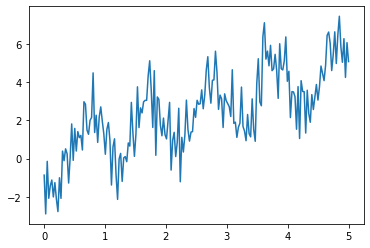

In [75]:
x = np.linspace(0,5,200)
y = x - np.sin(x*np.pi*2)*1.5 + np.random.normal(size=x.shape)
plt.plot(x,y);

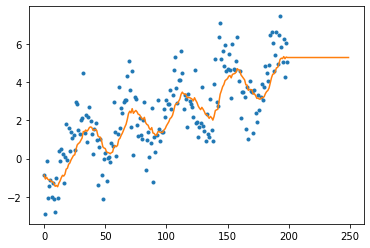

In [86]:
def hw1(y, alpha=0.1, n=None):
    # Holt-Winters
    if n is None:
        n = y.shape[0] + 50
    out = np.zeros(n)
    for i in range(n):
        if i==0:
            out[i] = y[i]
        elif i < y.shape[0]:
            out[i] = alpha*y[i] + (1-alpha)*out[i-1]
        else:
            out[i] = out[i-1]
    return out
    
# Test
plt.plot(y, '.')
plt.plot(hw1(y));

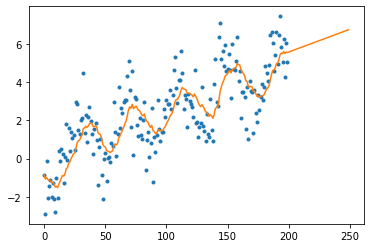

In [90]:
def hw2(y, alpha=0.1, beta=0.1, n=None):
    # Holt-Winters
    if n is None:
        n = y.shape[0] + 50
    out = np.zeros(n)
    b = np.zeros(n)
    for i in range(n):
        if i==0:
            out[i] = y[i]
            b[i] = 0        # Most common alternative: y[1]-y[0]
        elif i < y.shape[0]:        
            out[i] = alpha*y[i] + (1-alpha)*(out[i-1] + b[i-1])
            b[i] = beta*(y[i]-y[i-1]) + (1-beta)*b[i-1]
        else:
            b[i] = b[i-1]
            out[i] = out[i-1] + b[i]
    return out
    
# Test
plt.plot(y, '.')
plt.plot(hw2(y, beta=0.01));

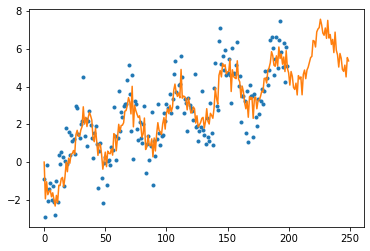

In [108]:
def hw3(y, alpha=0.1, beta=0.1, gamma=0.1, period=10, n=None):
    # Holt-Winters
    if n is None:
        n = y.shape[0] + 50
    out = np.zeros(n)
    l = np.zeros(n) # level
    b = np.zeros(n)
    s = np.zeros(n)
    for i in range(n):        
        if i==0:
            l[i] = y[i]
            continue
        elif i<y.shape[0]:
            if i < period:
                l[i] = alpha*y[i] + (1-alpha)*(l[i-1] + b[i-1])
                s[i] = gamma*y[i]
            else:
                l[i] = alpha*(y[i]-s[i-period]) + (1-alpha)*(l[i-1] + b[i-1])
                s[i] = gamma*(y[i] - l[i]) + (1-gamma)*s[i-period]            
            b[i] = beta*(y[i]-y[i-1]) + (1-beta)*b[i-1]
            #s[i] = gamma*()
        else:
            b[i] = b[i-1]
            l[i] = l[i-1] + b[i-1]
            s[i] = s[i-period]
                          
        out[i] = l[i] + s[i]
    return out
    
# Test
plt.plot(y, '.')
plt.plot(hw3(y, beta=0.01, gamma=0.3, period=40));